In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2022-10-01 14:22:14.629390: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [4]:
fake_data=pd.read_csv("../input/fake-news-detection-dataset-english/Fake.csv/Fake.csv")
real_data=pd.read_csv("../input/fake-news-detection-dataset-english/True.csv/True.csv")

Data Analysis

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


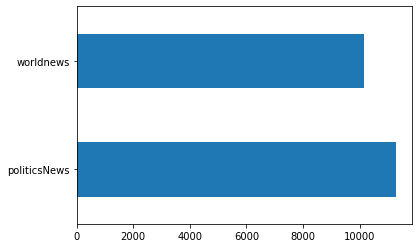

In [7]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

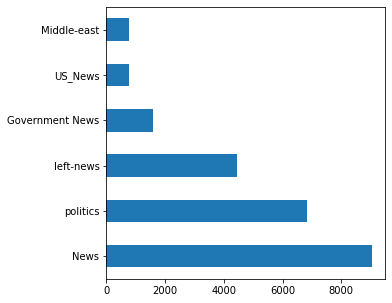

In [8]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

wordcloud real text data

In [9]:
wordcld_mask=np.array(Image.open("../input/wodcloud-twiter-pic/twitter.png"))

In [10]:
wordcld_text=" ".join(real_data["text"].tolist())

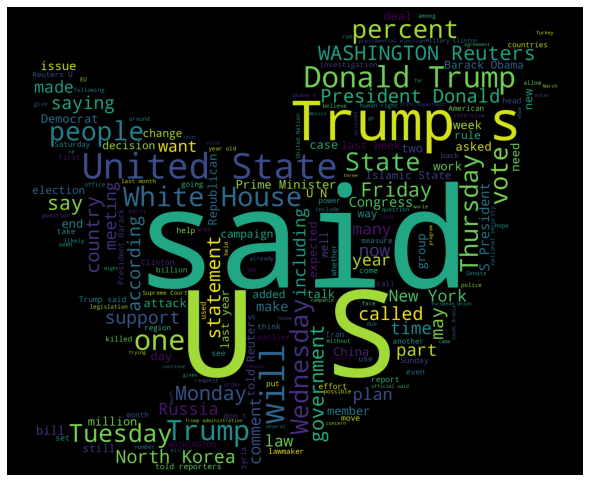

In [11]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud fake text data

In [12]:
fake_text=" ".join(fake_data["text"].tolist())

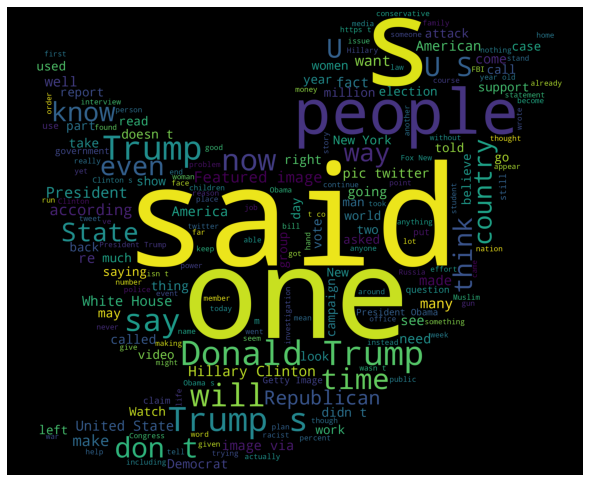

In [13]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
fake_data["label"]="fake"
real_data["label"]="real"

In [15]:
final_data= pd.concat([fake_data,real_data])

In [16]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [17]:
final_data.head(10)

,title,text,subject,date,label
0,Democrats face uphill fight if Trump gets seco...,WASHINGTON (Reuters) - If Democrats thought it...,politicsNews,"April 11, 2017",real
1,Alabama governor to face impeachment push in s...,(Reuters) - Alabama Governor Robert Bentley wi...,politicsNews,"April 5, 2016",real
2,"Anonymous Just Declared ‘TOTAL WAR’ On Trump,...",Donald Tiny Hands Trump might be in for a bi...,News,"March 15, 2016",fake
3,Trump says disappointed about collapse of Obam...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"July 18, 2017",real
4,Algeria's ruling parties retain majority in lo...,ALGIERS (Reuters) - Algeria s ruling parties r...,worldnews,"November 24, 2017",real
5,"Putin, Saudi king, stress need to coordinate o...",MOSCOW (Reuters) - Russia s President Vladimir...,worldnews,"November 21, 2017",real
6,Dem Senator Goes On HEARTWRENCHING Tweetstorm...,Donald the Trump went to speak at the NRA s an...,News,"April 28, 2017",fake
7,Obama to seek $755 million for cancer 'moonsho...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 1, 2016",real
8,Cowardly ESPN Won’t Stand Up For Black Report...,ESPN s Jemele Hill is one of the most influent...,News,"September 13, 2017",fake
9,Pope arrives in Colombia to help heal wounds o...,BOGOTA (Reuters) - Pope Francis arrived in Col...,worldnews,"September 6, 2017",real


In [18]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [19]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,Democrats face uphill fight if Trump gets seco...,WASHINGTON (Reuters) - If Democrats thought it...,real
1,Alabama governor to face impeachment push in s...,(Reuters) - Alabama Governor Robert Bentley wi...,real
2,"Anonymous Just Declared ‘TOTAL WAR’ On Trump,...",Donald Tiny Hands Trump might be in for a bi...,fake
3,Trump says disappointed about collapse of Obam...,WASHINGTON (Reuters) - President Donald Trump ...,real
4,Algeria's ruling parties retain majority in lo...,ALGIERS (Reuters) - Algeria s ruling parties r...,real
...,...,...,...
44893,Delusional ‘Dilbert’ Cartoonist Thinks He’ll ...,"Scott Adams, who s best known as the creator o...",fake
44894,Swiss right-wing's Blocher: Trump win a warnin...,ZURICH (Reuters) - Donald Trump’s U.S. electio...,real
44895,FOX NEWS REPORTER ASKS MAYOR Why She’s Using T...,The drip drip drip of the Left ensuring Christ...,fake
44896,John Kerry: Carnival should not bar Cuban-Amer...,MIAMI (Reuters) - U.S. Secretary of State John...,real


In [20]:
final_data.head()

,title,text,subject,date,label
0,Democrats face uphill fight if Trump gets seco...,WASHINGTON (Reuters) - If Democrats thought it...,politicsNews,"April 11, 2017",real
1,Alabama governor to face impeachment push in s...,(Reuters) - Alabama Governor Robert Bentley wi...,politicsNews,"April 5, 2016",real
2,"Anonymous Just Declared ‘TOTAL WAR’ On Trump,...",Donald Tiny Hands Trump might be in for a bi...,News,"March 15, 2016",fake
3,Trump says disappointed about collapse of Obam...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"July 18, 2017",real
4,Algeria's ruling parties retain majority in lo...,ALGIERS (Reuters) - Algeria s ruling parties r...,worldnews,"November 24, 2017",real


In [21]:
final_data.label.value_counts()

fake    23481
real    21417
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

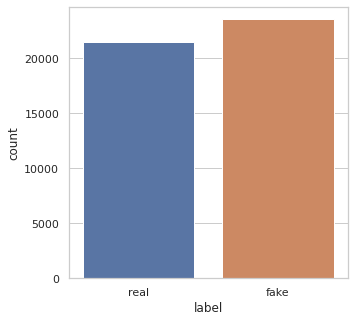

In [22]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [23]:
final_data.head(5)

,title,text,subject,date,label
0,Democrats face uphill fight if Trump gets seco...,WASHINGTON (Reuters) - If Democrats thought it...,politicsNews,"April 11, 2017",real
1,Alabama governor to face impeachment push in s...,(Reuters) - Alabama Governor Robert Bentley wi...,politicsNews,"April 5, 2016",real
2,"Anonymous Just Declared ‘TOTAL WAR’ On Trump,...",Donald Tiny Hands Trump might be in for a bi...,News,"March 15, 2016",fake
3,Trump says disappointed about collapse of Obam...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"July 18, 2017",real
4,Algeria's ruling parties retain majority in lo...,ALGIERS (Reuters) - Algeria s ruling parties r...,worldnews,"November 24, 2017",real


In [24]:
final_data["text"]=final_data["title"]+final_data["text"]

In [25]:
final_data=final_data[["text","label"]]

In [26]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [27]:
final_data.sample(5)

,text,label
13555,Bernie Sanders Could End Up Winning Iowa21st C...,0
28744,"For The 7th Year, Every Urban Prep Graduate A...",0
24793,"South Korea finds traces of radioactive gas, '...",1
11678,Alabama Supreme Court SHOCKS Conservatives Wi...,0
18707,"‘Vote All You Want, The Secret Government Won’...",0


In [28]:
final_data.label[9943]

0

In [29]:
final_data.text[36709]

' Trump Just Got Caught Trying To Blackmail Morning Joe HostsBlackmail is a crime. It s time to impeach Donald Trump.Despite a desperate effort by the White House to deny it, Trump derailed those efforts by posting on Twitter Friday morning.In response to a Washington Post story in which Joe Scarborough and Mika Brzezinski claim that Trump tried to blackmail them in order to force them to apologize by promising to stop a National Enquirer tabloid story about the pair if they complied with his demands, Trump went on Twitter and confirmed the whole thing.Watched low rated @Morning_Joe for first time in long time. FAKE NEWS. He called me to stop a National Enquirer article. I said no! Bad show  Donald J. Trump (@realDonaldTrump) June 30, 2017The problem for Trump is that while he claims Scarborough called him and he s the one who said no, Scarborough has actual evidence to support his side of the story and he informed Trump of that on Twitter while calling him out for lying at the same ti

In [30]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [31]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [32]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

2022-10-01 14:24:09.847139: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-01 14:24:09.851124: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-01 14:24:09.999569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 14:24:10.000298: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-10-01 14:24:10.000365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-01 14:24:10.037834: I tensorflow/stream_executor/platform/def

In [33]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [35]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [36]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [37]:
maxlen=100

create bert model

In [38]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model
    
    

In [39]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0           tf_bert_model[0][1]          

In [40]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [42]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']}, y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10


2022-10-01 14:34:04.896548: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-01 14:34:04.907208: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000185000 Hz


958/958 [==============================] - 407s 405ms/step - loss: 0.1422 - accuracy: 0.9382 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 2/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 5/10
958/958 [==============================] - 385s 401ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 6/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/10
958/958 [==============================] - 384s 401ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0039 - val_accura

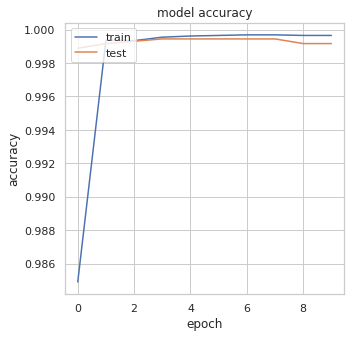

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

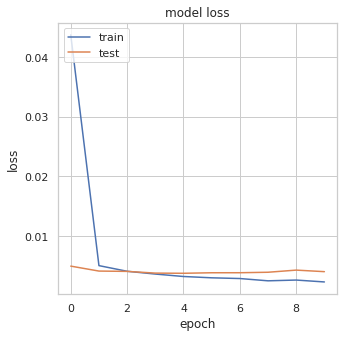

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

Confusion matrix

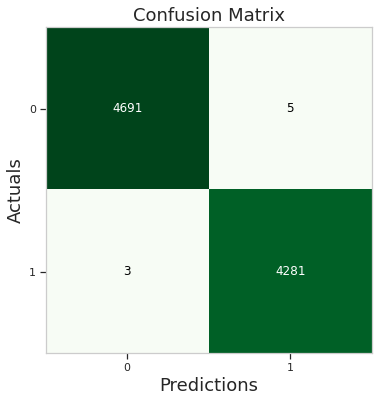

In [46]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Custom data prediction

In [48]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [49]:
test_token = tokenize(test_text)

In [50]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)

In [51]:
test_text_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [52]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
